<a href="https://colab.research.google.com/github/Kvaibhav1997/PIMA-Diabetes-Data/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics

In [134]:
df=pd.read_csv("diabetes.csv")

In [135]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [139]:
df.shape

(768, 9)

In [140]:
#df.value_counts()

In [141]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [142]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

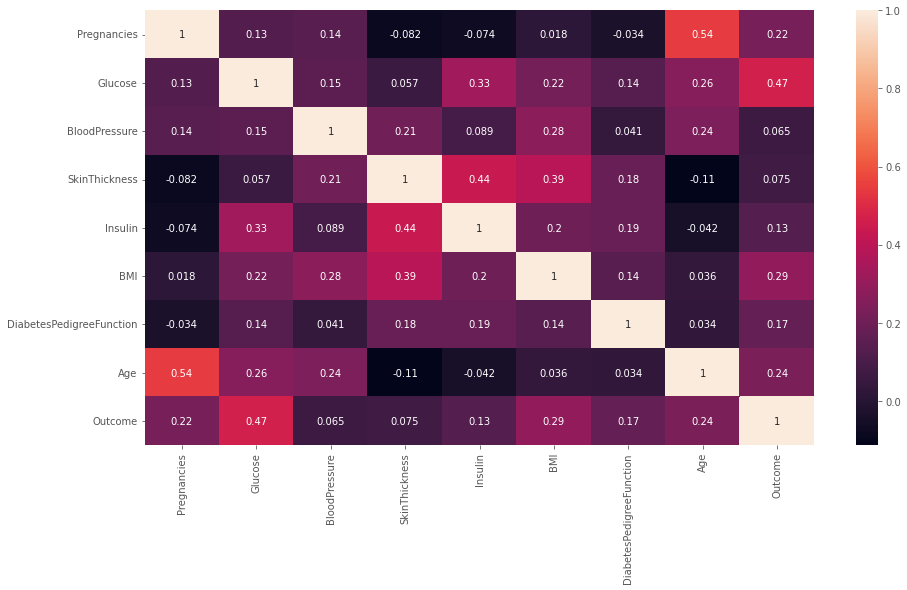

In [143]:
corr_data=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_data, annot=True)
plt.show()

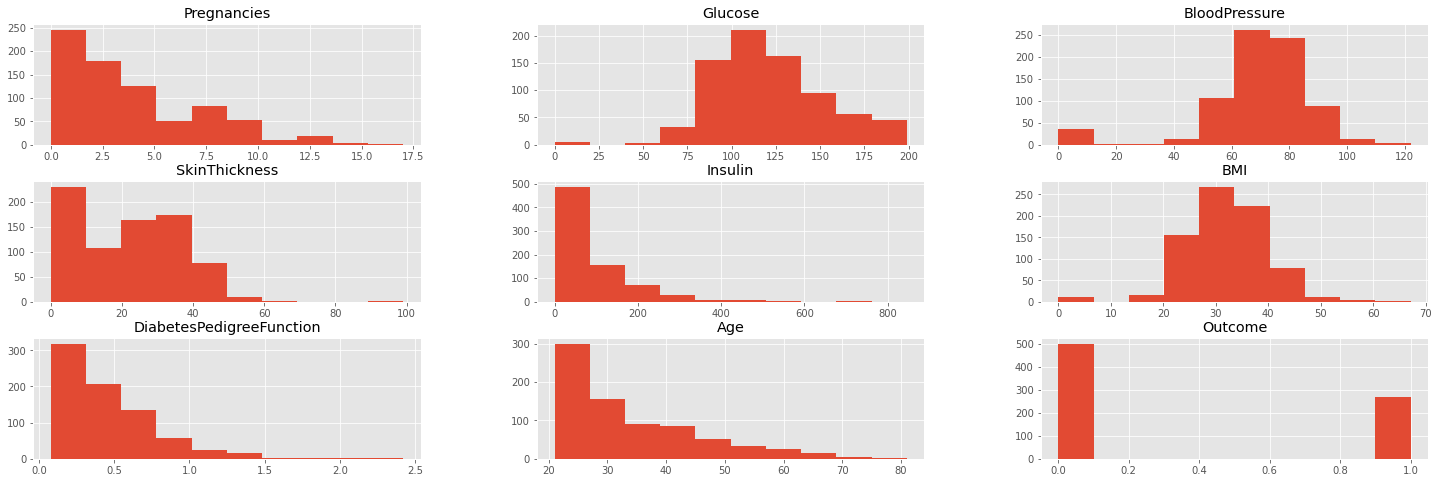

In [144]:
df.hist(figsize=(25,8))
plt.show()

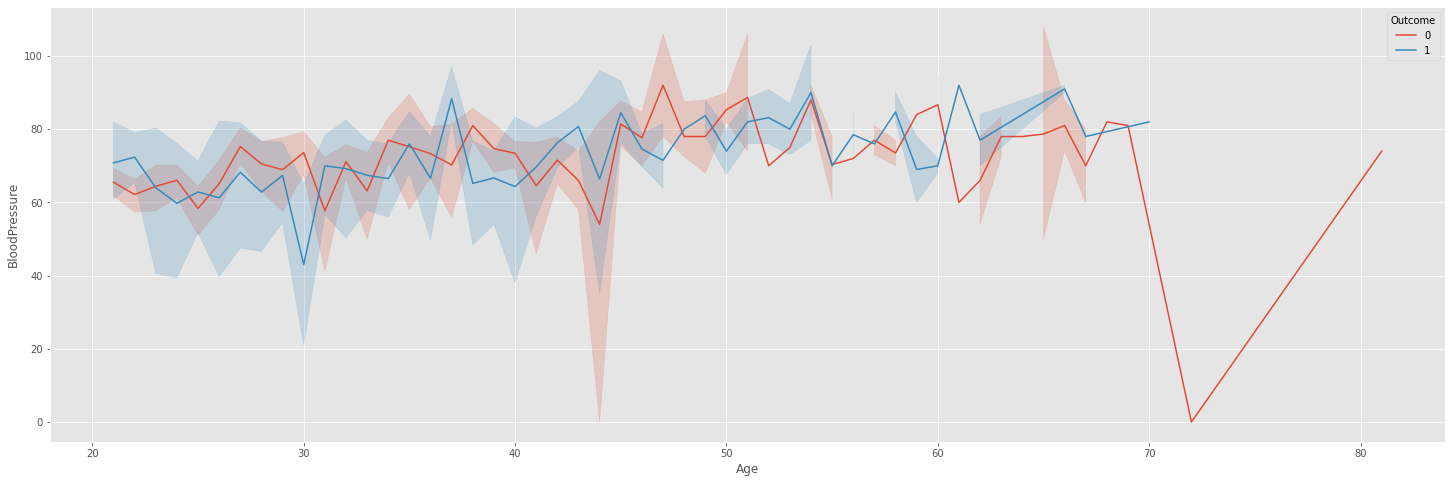

In [145]:
plt.figure(figsize=(25, 8))
sns.lineplot(y='BloodPressure', x='Age',hue='Outcome', data=df)
plt.show()


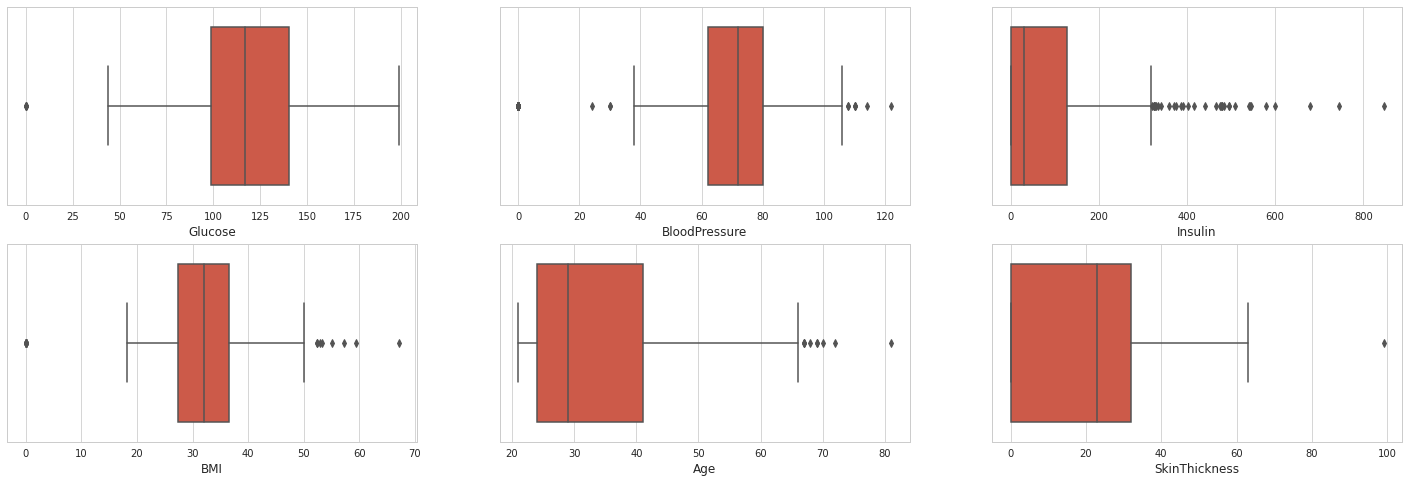

In [146]:
plt.figure(figsize=(25,8))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness', data=df)
plt.show()

<Figure size 1800x576 with 0 Axes>

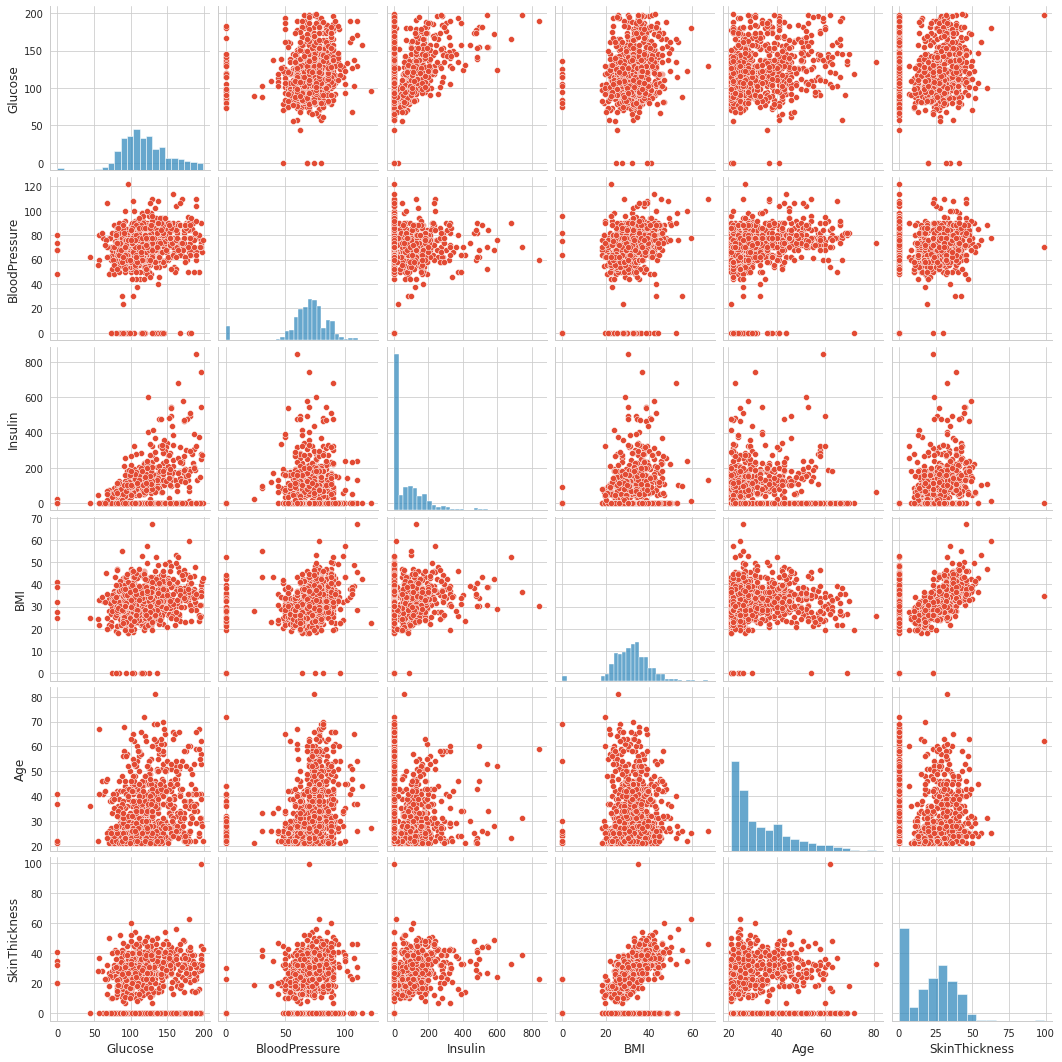

In [147]:
plt.figure(figsize=(25,8))
data1=['Glucose','BloodPressure','Insulin','BMI','Age','SkinThickness']
sns.pairplot(df[data1], palette='Accent')
plt.show()

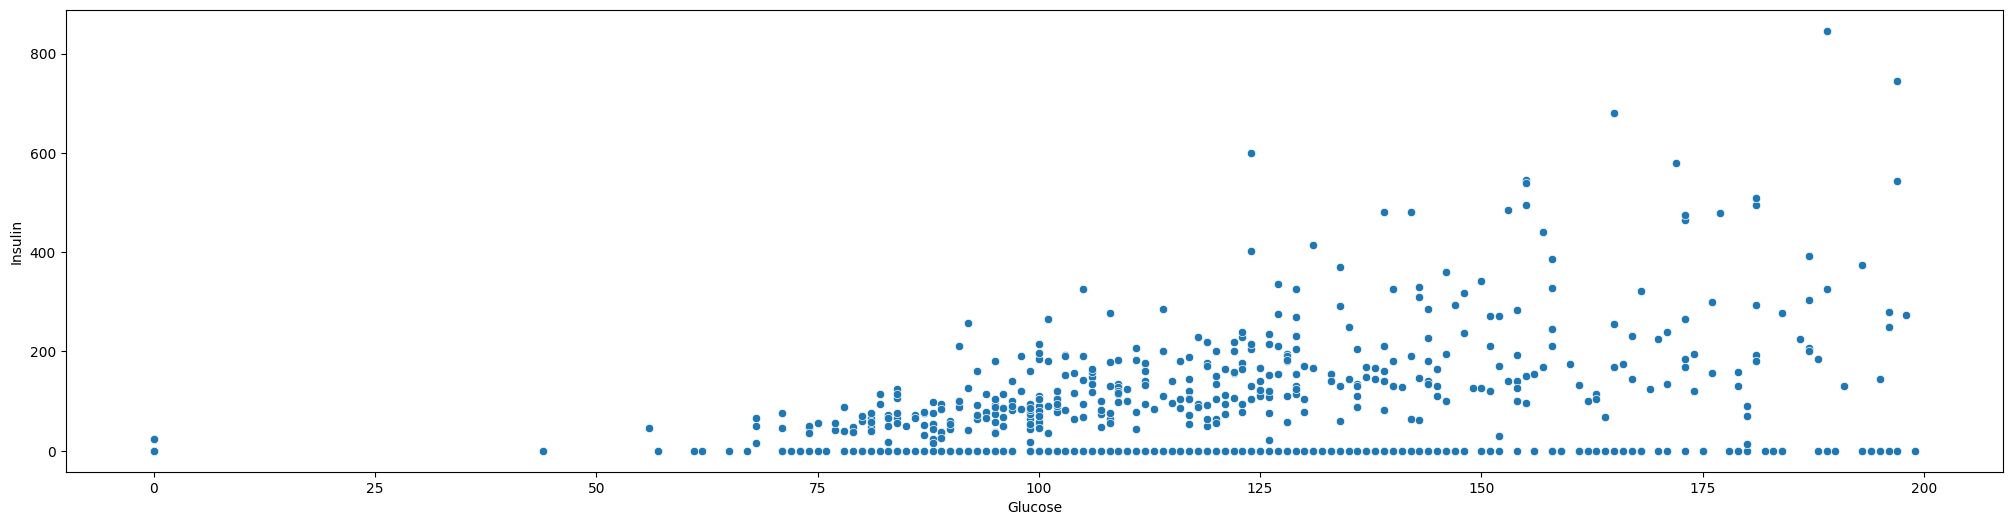

In [148]:
plt.style.use("default")
plt.figure(figsize=(25,6))
sns.scatterplot(x='Glucose', y= 'Insulin', data=df)

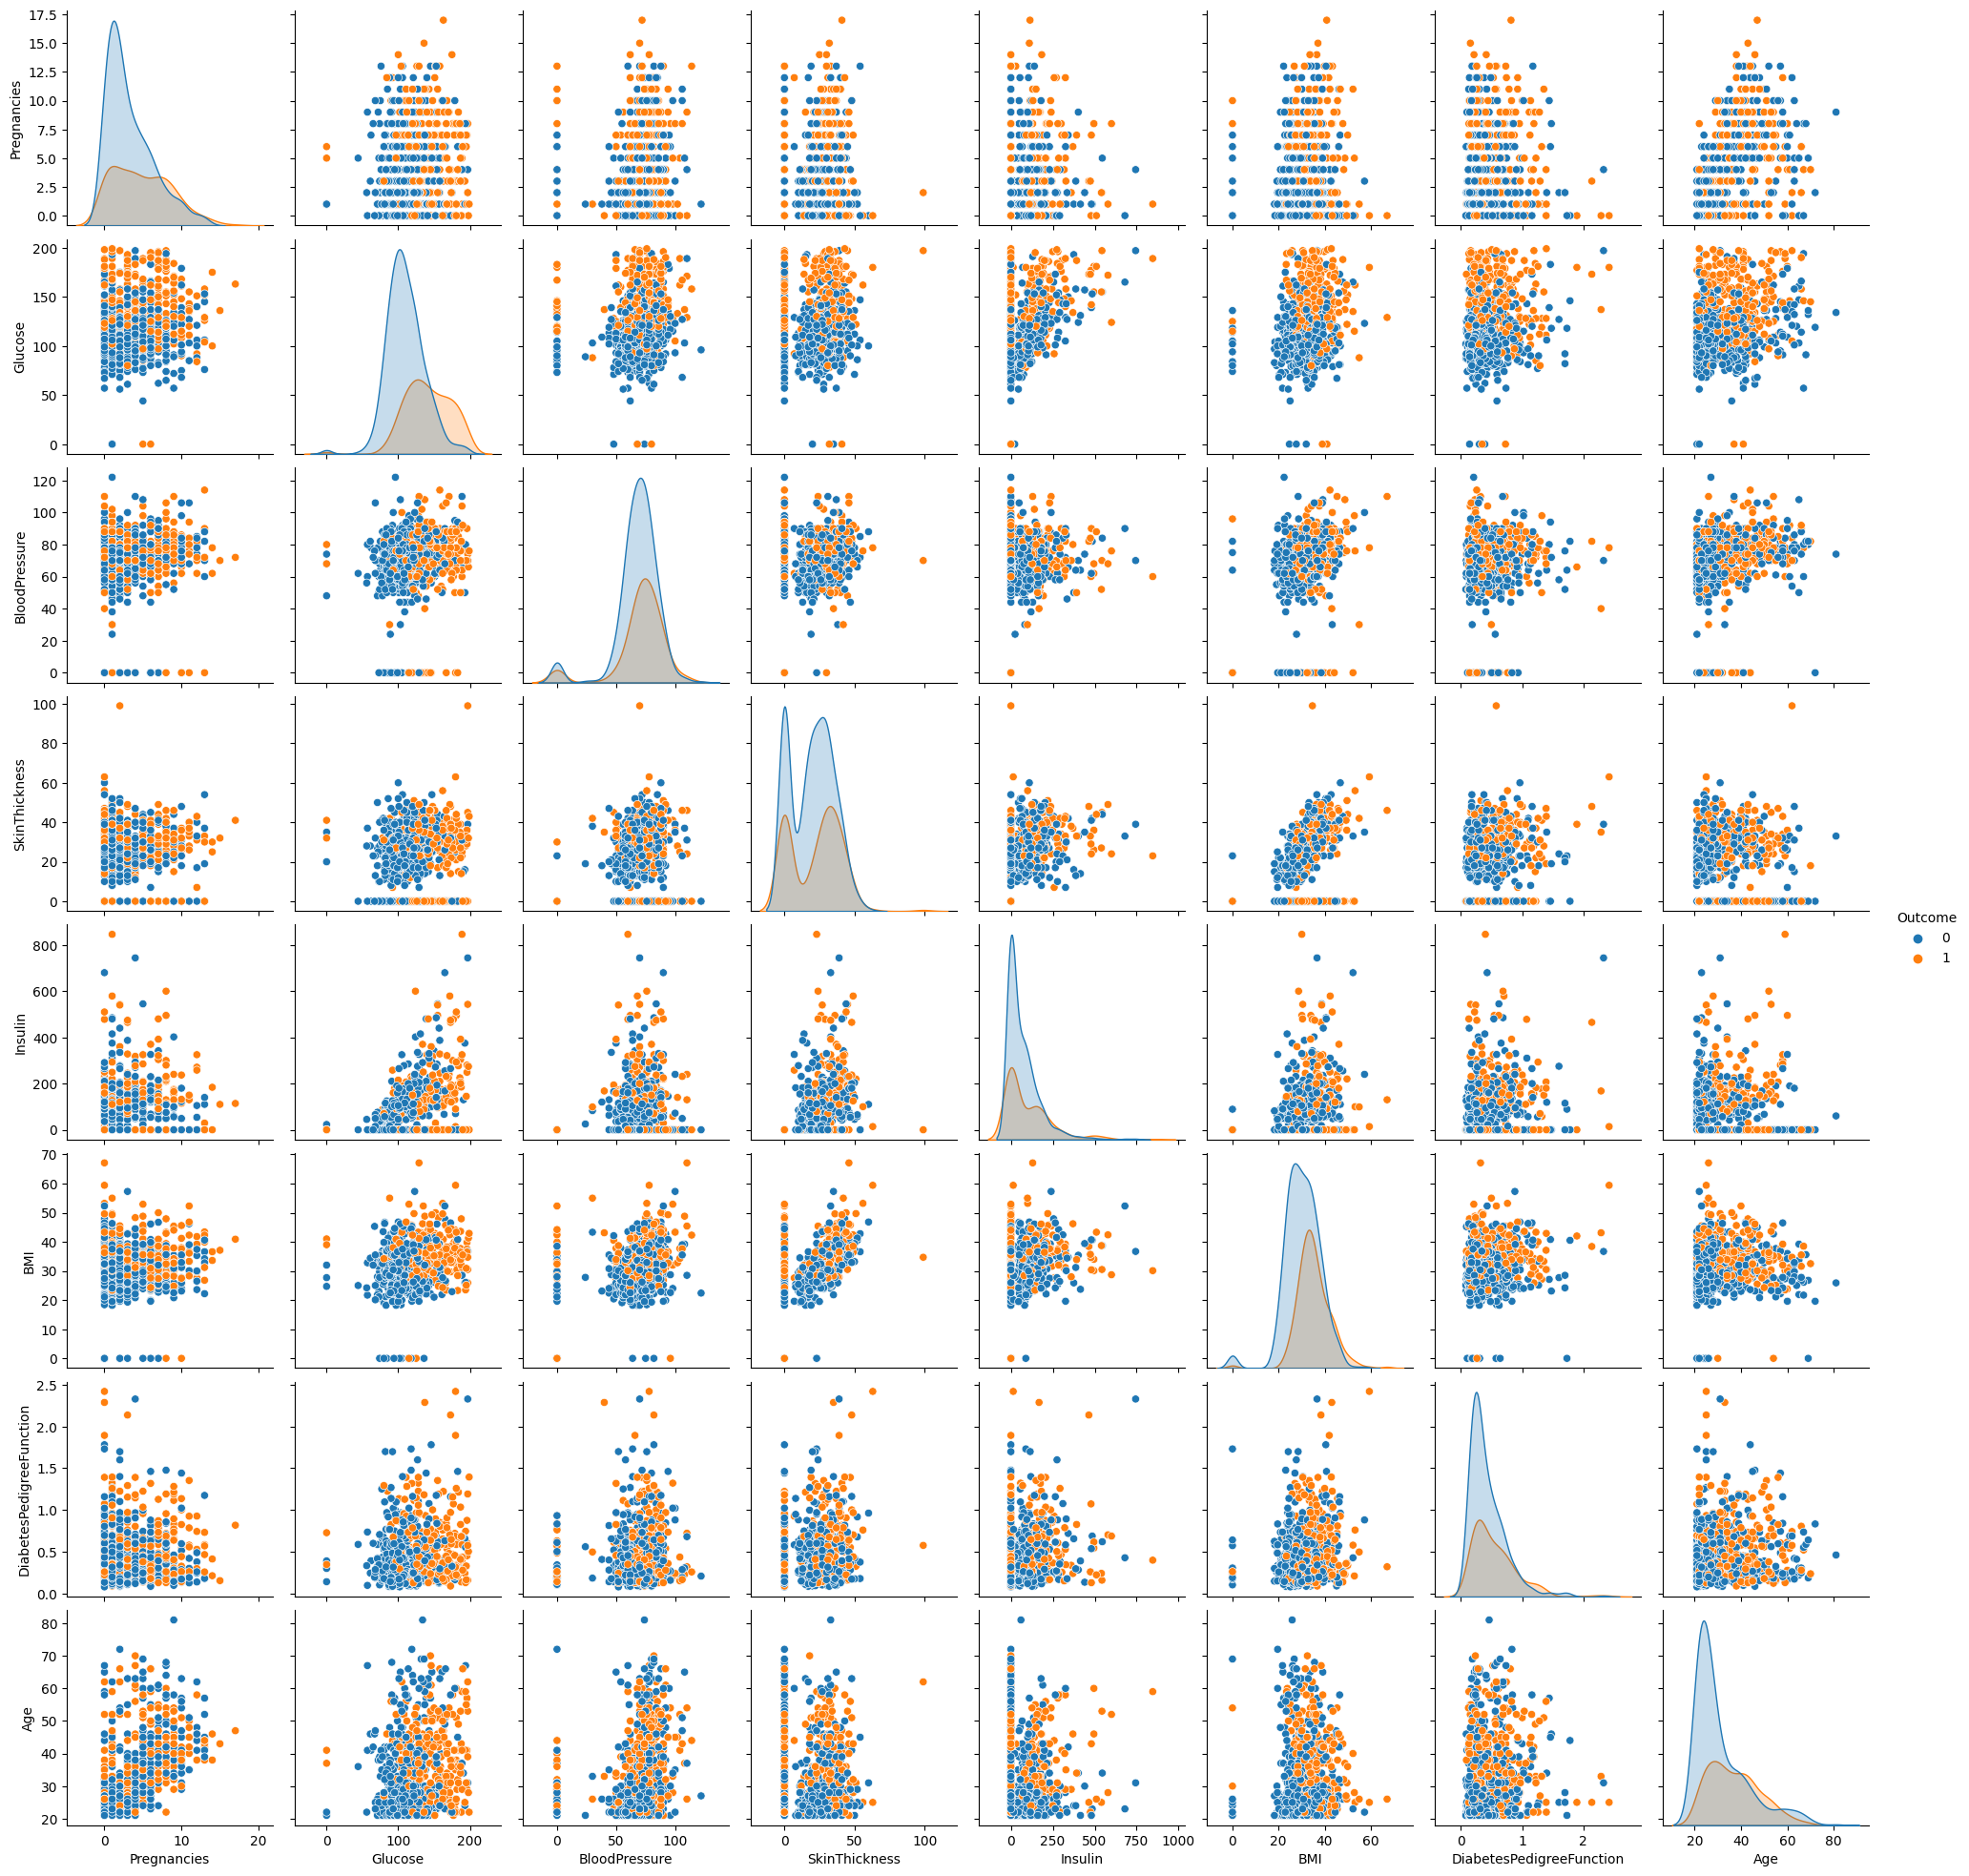

In [149]:
sns.pairplot(df,hue='Outcome')

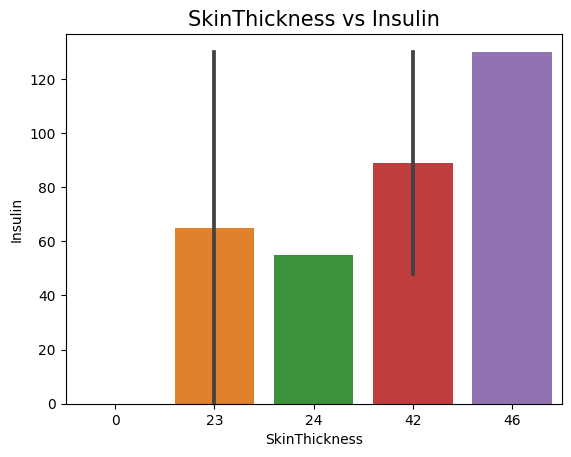

In [150]:
sns.barplot(x="SkinThickness", y="Insulin", data=df[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

#Training and Testing the Data

In [151]:
#train_test_splitting of the dataset

x = df.drop(columns = 'Outcome')

# Getting Predicting Value
y = df['Outcome']

In [152]:
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x)
x_data = pd.DataFrame(x_data)

In [153]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


#Models

###Logistic Regression

In [154]:
#LOGISTIC Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)  

LogisticRegression()

In [155]:
y_pred_log=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred_log))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_log))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_log))
print("R2 score is:\n",r2_score(y_test,y_pred_log))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

Confusion Matrix:
 [[99  8]
 [20 27]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [156]:
Logistic_r=accuracy_score(y_test,y_pred_log)*100
Logistic_r

81.81818181818183

###KNeighbour Classifier

In [157]:
#Kneighbour Classifier
from sklearn.neighbors import KNeighborsClassifier

In [158]:
Range_k = range(1,20)
scores = {}
R2_scores={}
scores_list = []
R2_scores_list=[]
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(x_train, y_train)
   y_pred = classifier.predict(x_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
   R2_scores[k] = metrics.r2_score(y_test,y_pred)
   R2_scores_list.append(metrics.r2_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[97 10]
 [21 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



0.08132829588387358


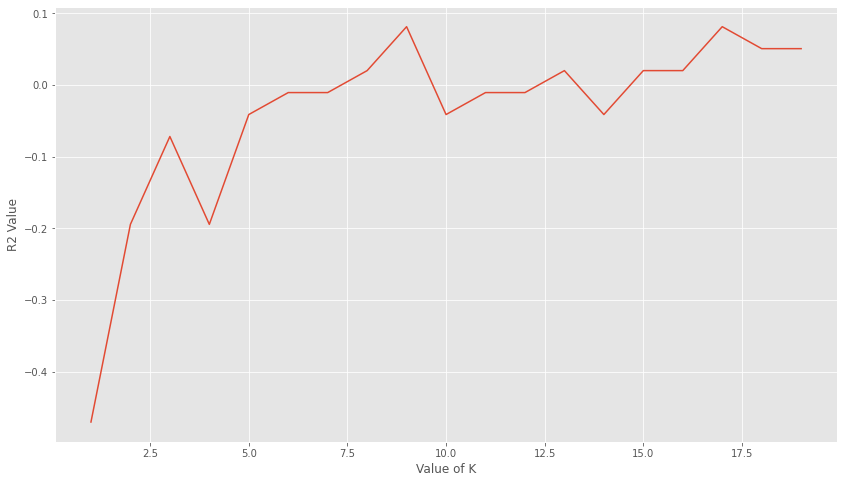

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(Range_k,R2_scores_list)
plt.xlabel("Value of K")
plt.ylabel("R2 Value")
print(max(R2_scores_list))

Text(0, 0.5, 'Accuracy')

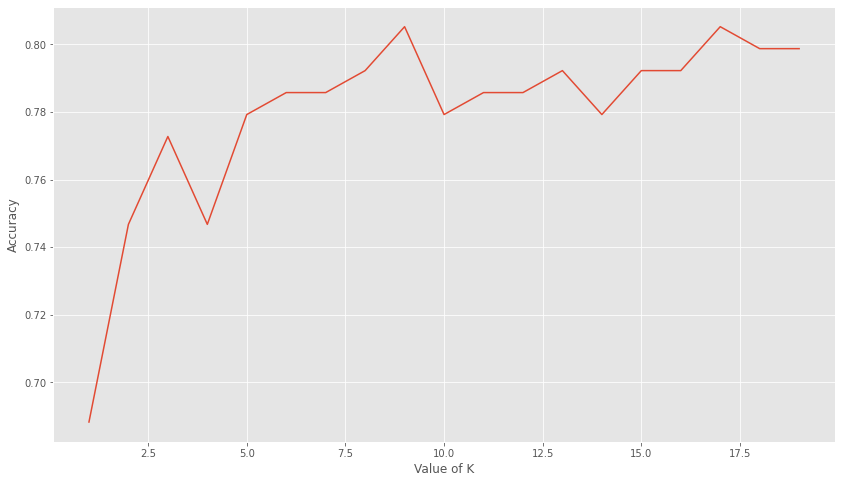

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [161]:
knn_data_acc=pd.DataFrame({"Range of K Value":[i for i in Range_k],"Accuracy":[k for k in scores_list],"R2 Score":[l for l in R2_scores_list]})
knn_data_acc.set_index('Range of K Value', inplace=True)
knn_data_acc

,Accuracy,R2 Score
Range of K Value,,
1,0.688312,-0.469875
2,0.746753,-0.194273
3,0.772727,-0.071784
4,0.746753,-0.194273
5,0.779221,-0.041161
6,0.785714,-0.010539
7,0.785714,-0.010539
8,0.792208,0.020084
9,0.805195,0.081328


In [162]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
knn=accuracy_score(y_test, y_pred)*100
knn

77.92207792207793

###Support Vector Classifier

In [163]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [164]:
y_pred_svc=svc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_svc))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_svc))
print("R2 score is:\n",r2_score(y_test,y_pred_svc))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154

Confusion Matrix:
 [[97 10]
 [21 26]]
Training Score:
 79.80456026058633
Mean Squared Error:
 0.2012987012987013
R2 score is:
 0.05070590574666933


In [165]:
svm=accuracy_score(y_test,y_pred_svc)*100
svm

79.87012987012987

###Naive Bayes Classifier

In [166]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [167]:
y_pred_nb=gnb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_nb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_nb))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_nb))
print("R2 score is:\n",r2_score(y_test,y_pred_nb))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [168]:
Naive_bayes=accuracy_score(y_test, y_pred_nb)*100
Naive_bayes

79.22077922077922

###Decision Tree Classiier

In [169]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [170]:
y_pred_dtc=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_dtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dtc))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_dtc))
print("R2 score is:\n",r2_score(y_test,y_pred_dtc))

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[93 14]
 [27 20]]
Training Score:
 82.08469055374593
Mean Squared Error:
 0.2662337662337662
R2 score is:
 -0.2555179956253728


In [171]:
dtc=accuracy_score(y_test,y_pred_dtc)*100
dtc

73.37662337662337

###Random Tree Classifier

In [172]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [173]:
y_pred_rtc=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_rtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rtc))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_rtc))
print("R2 score is:\n",r2_score(y_test,y_pred_rtc))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
 [[96 11]
 [19 28]]
Training Score:
 100.0
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


In [174]:
rtc=accuracy_score(y_test,y_pred_rtc)*100
rtc

80.51948051948052

###AdaBoost Classifier

In [175]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [176]:
y_pred_ab=adb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_ab))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ab))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_ab))
print("R2 score is:\n",r2_score(y_test,y_pred_ab))

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
 [[89 18]
 [16 31]]
Training Score:
 81.75895765472313
Mean Squared Error:
 0.22077922077922077
R2 score is:
 -0.0411612646649433


In [177]:
ab=accuracy_score(y_test,y_pred_ab)*100
ab

77.92207792207793

###Gradient Boosting Classifier

In [178]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [179]:
y_pred_gbc=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

Confusion Matrix:
 [[93 14]
 [20 27]]
Training Score:
 91.85667752442997
Mean Squared Error:
 0.22077922077922077
R2 score is:
 -0.0411612646649433


In [180]:
gbc=accuracy_score(y_test,y_pred_gbc)*100

###XGB Classifier

In [181]:
#XGB Classifier
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[14:04:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear')

In [182]:
y_pred_xgb=xgb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_xgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_xgb))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_xgb))
print("R2 score is:\n",r2_score(y_test,y_pred_xgb))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.80      0.60      0.68        47

    accuracy                           0.83       154
   macro avg       0.82      0.77      0.78       154
weighted avg       0.83      0.83      0.82       154

Confusion Matrix:
 [[100   7]
 [ 19  28]]
Training Score:
 86.31921824104235
Mean Squared Error:
 0.16883116883116883
R2 score is:
 0.20381785643269046


In [183]:
xbg_accuracy=accuracy_score(y_test,y_pred_xgb)*100
xbg_accuracy

83.11688311688312

###Extra Trees Classifier

In [184]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [185]:
y_pred_etc=etc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_etc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_etc))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_etc))
print("R2 score is:\n",r2_score(y_test,y_pred_etc))

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
 [[93 14]
 [16 31]]
Training Score:
 100.0
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


In [186]:
etc=accuracy_score(y_test,y_pred_etc)*100
etc

80.51948051948052

##Model Record

In [187]:
data = {'Model Name':['Logistic Regression', 'KNeighbour Classifier', 'Support Vector Machine', 'Naive Bayes Classifier', 'Decision Tree Classifier','Random Tree Classifier','AdaBoost Classifier','Gradient Boosting Classifier', 'XGB Classifier','Extra Tree Classifier'],
        'Age':[Logistic_r, knn, svm, Naive_bayes,dtc,rtc,ab,gbc, xbg_accuracy,etc]}
Model_record=pd.DataFrame(data)
Model_record

,Model Name,Age
0,Logistic Regression,81.818182
1,KNeighbour Classifier,77.922078
2,Support Vector Machine,79.870130
3,Naive Bayes Classifier,79.220779
4,Decision Tree Classifier,73.376623
5,Random Tree Classifier,80.519481
6,AdaBoost Classifier,77.922078
7,Gradient Boosting Classifier,81.168831
8,XGB Classifier,83.116883
9,Extra Tree Classifier,80.519481
